# Here is the height and weiht simple LR

# 

In [70]:
# imports all the libraries
import numpy as np
import random as rnd
import pandas as pd
import matplotlib.pyplot as plt
# import sklearn as sk
import seaborn as sns
%matplotlib inline 

In [71]:
# make a random dataset
rnd.seed(42)
data = {
    "Height" :[round(rnd.uniform(140, 200), 1) for _ in range(40)],
    "Weight" :[round(rnd.uniform(40, 100), 0) for  _ in range(40)]
}

data = pd.DataFrame(data)

In [72]:
# save this dataset

data.to_csv('./data/height_weight_data.csv', index=False)

In [73]:
data.head()
# data.duplicated().sum()

,Height,Weight
0,178.4,82.0
1,141.5,43.0
2,156.5,54.0
3,153.4,57.0
4,184.2,45.0


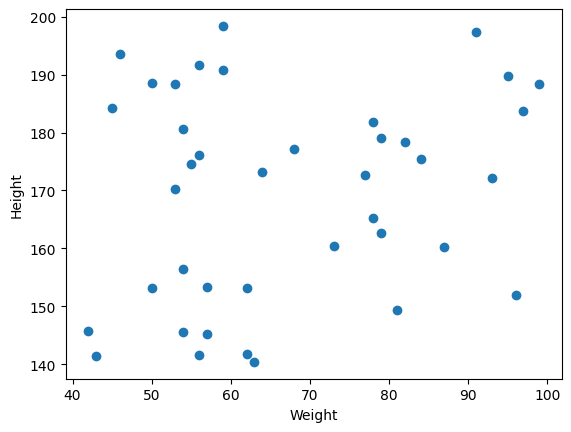

In [74]:
# check relation for this data
# scatter plot this dataset
plt.scatter(x=data['Weight'], y=data['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [75]:
# correlation
data.corr()

,Height,Weight
Height,1.000000,0.204485
Weight,0.204485,1.000000


<Figure size 2000x800 with 0 Axes>

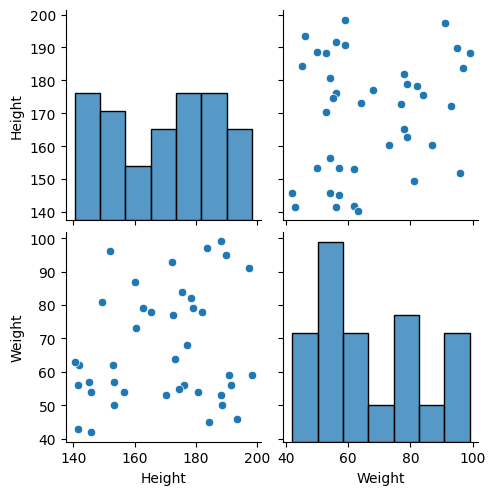

In [76]:
# seaborn for visualization
plt.figure(figsize=(20, 8))
sns.pairplot(data)
# sns.boxplot(data)
plt.show()

In [77]:
# dependent and independent varibale
# data.head()
X = data[['Weight']] # always independent features should be DF or 2D array like: (40, 1)
y = data['Height']  # it always be an one columns so it can be np.array or series
# X.shape
# y.shape

In [78]:
# test and train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# random_state = 42 for why?

In [79]:
# X_train.shape
# y_train.shape
## standardziation if we have a bigger value the for GD and get global minima it takes much time thats why we use standardziation using z-score method where mean=0 and sd=1 :-> (x^i - mean) / sd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.96499454],
       [-0.54595724],
       [ 1.50893718],
       [ 1.56937525],
       [ 0.48148997],
       [ 0.4210519 ],
       [ 0.78368033],
       [ 1.20674683],
       [ 0.66280418],
       [-0.72727146],
       [-1.02946182],
       [-1.08989989],
       [-1.6942806 ],
       [-0.90858567],
       [ 0.4210519 ],
       [-1.02946182],
       [-1.08989989],
       [ 1.44849911],
       [-0.8481476 ],
       [-0.4250811 ],
       [ 0.60236611],
       [ 1.32762297],
       [-0.54595724],
       [ 0.11886154],
       [-1.2712141 ],
       [ 1.6902514 ],
       [-0.8481476 ],
       [ 0.48148997],
       [-0.72727146],
       [-0.90858567]])

In [80]:
# diff of fit_transform and fit
# for test we only use transform cause we want to use the mean and sd of X_train to Standarize the test data
# data leackage
X_test = scaler.transform(X_test)
X_test
# X_test

array([[-0.48551917],
       [-1.2712141 ],
       [ 0.36061383],
       [-1.02946182],
       [-1.57340446],
       [-0.90858567],
       [-0.18332882],
       [-1.75471867],
       [-0.96902374],
       [-1.51296639]])

In [81]:
# Apply SLR for fit thios model
from sklearn.linear_model import LinearRegression

In [84]:
regression = LinearRegression(n_jobs=-1)
'''
    The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems, that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. 
'''

'\n    The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems, that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. \n'

In [85]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [94]:
# predict data
print(f"Coefficient or Slope or Weight (w): {regression.coef_}")
print(f"Intercept (b): {regression.intercept_}")

'''
    Coefficient or Slope or Weight (w): [2.8353111] 
    -> যদি এক ইউনিট ওজন বাড়ে তবে 2.8353111 ইউনিট উচ্চতা বাড়ে।
    
    Intercept (b): 171.52 
    -> এই মান হলো সেই উচ্চতা যখন ওজন 0। অর্থাৎ, যদি কাউকে 0 কেজি ওজন দেওয়া হয়, তবে তার উচ্চতা হবে 171.52 সেমি।
'''

# এখন আমরা কিছু পূর্বানুমানিত (predicted) উচ্চতা বের করে দেখতে পারি।
# predicted_heights = regression.predict(X_test)
# print(f"Predicted Heights: {predicted_heights}")


Coefficient or Slope or Weight (w): [2.8353111]
Intercept (b): 171.52


'\n    Coefficient or Slope or Weight (w): [2.8353111] \n    -> যদি এক ইউনিট ওজন বাড়ে তবে 2.8353111 ইউনিট উচ্চতা বাড়ে।\n    \n    Intercept (b): 171.52 \n    -> এই মান হলো সেই উচ্চতা যখন ওজন 0। অর্থাৎ, যদি কাউকে 0 কেজি ওজন দেওয়া হয়, তবে তার উচ্চতা হবে 171.52 সেমি।\n'

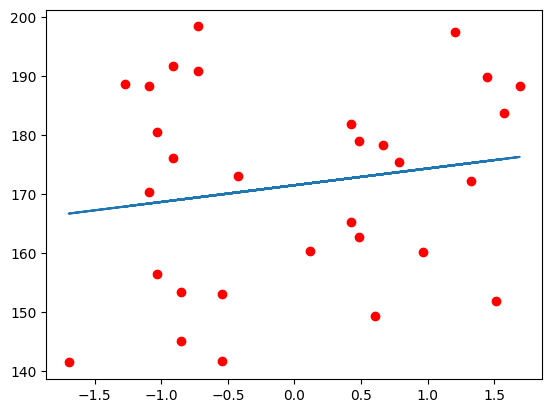

In [97]:
# plot the training data plot best fir lin
plt.scatter(X_train, y_train, color='red')
# Here we show best fit line
plt.plot(X_train, regression.predict(X_train))
plt.show()

In [100]:
# prediction for test data
y_pred = regression.predict(X_test)

In [104]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [102]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

In [103]:
mse, mae, rmse

(386.3418376596, 17.104462090434225, 19.655580318566024)

In [107]:
# measure performance
# R-square = 1 - SSR/SSt
# squares of residuals
r_square = r2_score(y_test, y_pred)

In [108]:
r_square

-0.11326765196734301

In [109]:
correlation = data['Weight'].corr(data['Height'])
print(f'Correlation between Weight and Height: {correlation}')

'''
    A strong correlation (close to ±1) suggests that linear regression may perform well.
    A weak correlation (close to 0) may explain poor model performance.
'''

Correlation between Weight and Height: 0.20448527826992977


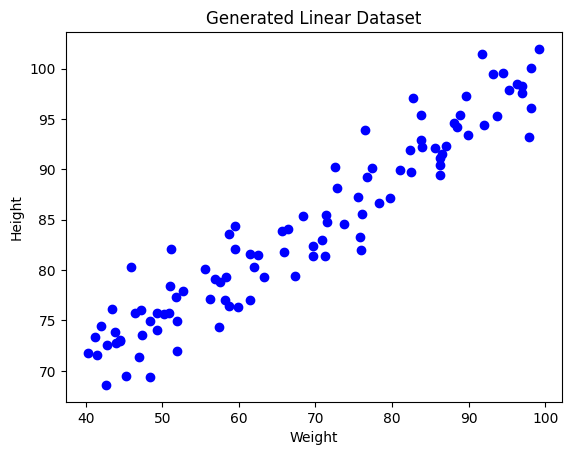

In [110]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate random values for X (independent variable)
X = np.random.uniform(40, 100, 100)  # 100 random values between 40 and 100

# Define a linear relationship: y = m*x + b + noise
m = 0.5  # Slope
b = 50   # Intercept
noise = np.random.normal(0, 3, 100)  # Random noise with mean=0 and std=3

# Calculate y (dependent variable)
y = m * X + b + noise

# Create a DataFrame for the dataset
linear_data = pd.DataFrame({'Weight': X, 'Height': y})

# Save the dataset to a CSV file (optional)
linear_data.to_csv('linear_dataset.csv', index=False)

# Scatter plot to visualize the dataset
plt.scatter(linear_data['Weight'], linear_data['Height'], color='blue')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Generated Linear Dataset')
plt.show()

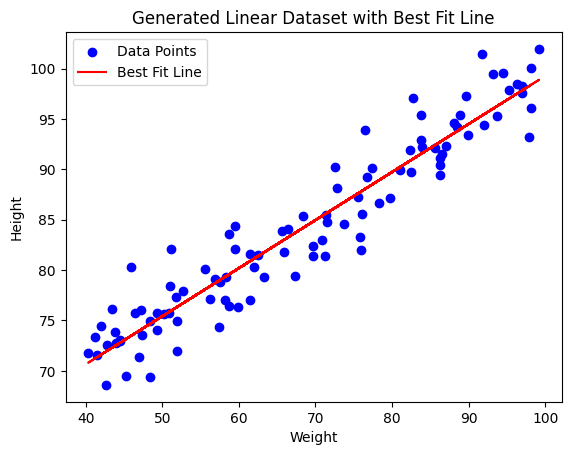

Slope (m): 0.4770113386438485
Intercept (b): 51.564834926886306
R-squared (R^2): 0.9081
Mean Absolute Error (MAE): 2.1031
Mean Squared Error (MSE): 7.2593
Root Mean Squared Error (RMSE): 2.6943


In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set a random seed for reproducibility
np.random.seed(42)

# Generate random values for X (independent variable)
X = np.random.uniform(40, 100, 100).reshape(-1, 1)  # Reshape for sklearn compatibility

# Define a linear relationship: y = m*x + b + noise
m = 0.5  # Slope
b = 50   # Intercept
noise = np.random.normal(0, 3, 100)  # Random noise with mean=0 and std=3

# Calculate y (dependent variable)
y = m * X.flatten() + b + noise

# Fit a Linear Regression model
regression = LinearRegression()
regression.fit(X, y)

# Predicted values for the best-fit line
y_pred = regression.predict(X)

# Scatter plot to visualize the dataset
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the best-fit line
plt.plot(X, y_pred, color='red', label='Best Fit Line')

# Add labels and title
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Generated Linear Dataset with Best Fit Line')
plt.legend()
plt.show()

# Print the slope and intercept
print(f"Slope (m): {regression.coef_[0]}")
print(f"Intercept (b): {regression.intercept_}")



from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print(f"R-squared (R^2): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
